In [1]:
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)
import tensorflow 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from keras.regularizers import l2
from keras.callbacks import CSVLogger
from tensorflow import keras
from keras import metrics
from keras import backend as K
import numpy as np
import pandas as pd
import time
import pydot
import gensim
from gensim.models import Word2Vec
import string
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
#membaca data json
df = pd.read_json("data2knewfix.json")
#mengambil kolom data
dff = df['data'][2]
#merubah list data menjadi dataframe
dt=pd.DataFrame(dff,columns=['id_case','class','sentence1','sentence2'])
pd.set_option('display.max_rows', dt.shape[0]+1)
dt

id_case class                                          sentence1  \
0         32     5  Recently, there has been a successful attempt ...   
1         34     5  The first one is the WS-353 dataset (Finkelste...   
2         35     5  Abstract Meaning Representation (AMR) (Banares...   
3         36     5  We perform bootstrap resampling with bounds es...   
4         37     5  It is used to support semantic analyses in HPS...   
5       1201     4  We use Stanford parser (de Marneffe et al., 20...   
6       1202     3  Rooth et al. (1999) propose an Expectation-Max...   
7       1203     3  The Levenshtein distance (Levenshtein, 1966) b...   
8       1204     1  We use the Moses toolkit (Koehn et al., 2007) ...   
9         36     5  We perform bootstrap resampling with bounds es...   
10        37     5  It is used to support semantic analyses in HPS...   
11        38     3  It is used to support semantic analyses in the...   
12        39     4  It is used to support semantic analyses in HPS...   
13        40     4  It is used to support semantic analyses in the...   
14        43     3  We build upon our previous Markov Logic based ...   
15        44     2  Details about SVM and KFD can be found in (Tay...   
16        46     3  We learn the parameters using a quasi-Newton p...   
17        47     5  We use the SCFG decoder cdec (Dyer et al., 201...   
18        48     4  This is known as the Distributional Hypothesis...   
19        49     4  All our models , as well as the parser describ...   
20        51     4  For strings, many such kernel functions exist ...   
21        53     2  The estimation of the semantically Smoothed Pa...   
22        55     2  We train with the Adam optimizer (Kingma and B...   
23        56     3  In our experimental study, we use the freely a...   
24        58     2  More recently, (Carpineto and Romano, 2010) sh...   
25        59     4  They are based on the distributional hypothesi...   
26        60     4  Word alignment is performed using GIZA++ (Och ...   
27        61     4  Word alignment is performed using GIZA++ (Och ...   
28        62     3  We used Mallet software (McCallum, 2002) for C...   
29        63     3  The thesaurus consists of a hierarchy of 2,710...   
30        64     4  The detailed discussion is provided in the lon...   
31        66     4  The first one is the WS- 353 3 dataset (Finkel...   
32        68     3  A framework for human error analysis and error...   
33        69     4  MaxEnt classifier is a good example of this gr...   
34        70     4  Among these media, blog is one of the communic...   
35        71     3  For the gold preprocessing and all 5k settings...   
36        73     2  For preprocessing, we used MADA (Morphological...   
37        74     4  We trained a 5-gram language model on the Xinh...   
38        75     4  To determine semantic type and subtype, we tra...   
39        76     2  We use the scikit implementation of Random For...   
40        78     3  Each term in the input text will be represente...   
41        79     5  An algorithm, the Kuhn-Munkres method (Kuhn, 1...   
42        81     3  We use Collapsed Gibbs Sampling (Griffiths and...   
43        82     5  We use the Stanford dependency parser (Marneff...   
44        83     5  Filter weights are initialized using Glorot-Be...   
45        85     4  Automatic sentence alignment of the training d...   
46        86     2  We use the AdaGrad optimizer (Duchi et al., 20...   
47        87     5  Then we did word alignment using GIZA++ (Och a...   
48        88     4  For example, DIRT (Lin and Pantel, 2001) aims ...   
49        89     3  The annotation was performed manually using th...   
50        91     4  System proposed by (Li et al., 2006 ), uses a ...   
51        92     3  This corpus contains around 11,000 NPs annotat...   
52        93     4  All modules take as input the corpus documents...   
53        95     4  From the pioneering work of (Rapp, 1995 ), 

In [3]:
#cek jumlah dataset dari setiap kelas
dt['class'].value_counts()

5    822
4    714
3    451
2     32
0      6
1      2
Name: class, dtype: int64

In [4]:
#panjang kalimat 
text1 = dt['sentence1'].tolist()
text2 = dt['sentence2'].tolist()
text = [] 
for i in range(0, len(text1)): 
    text.append(text1[i]+text2[i]) 
text

['Recently, there has been a successful attempt to harmonize the linguistic principles behind the coding systems MSD and KR (Farkas et al., 2010 ).Recently, there has been a successful attempt to harmonize the coding systems MSD and KR (Farkas et al., 2010 ).',
 'The first one is the WS-353 dataset (Finkelstein et al., 2001) containing 353 pairs of English words that have been assigned similarity ratings by humans.The first one is the WS-353 dataset (Finkelstein et al., 2001 ), which contains 353 pairs of English words that have been assigned similarity ratings by humans.',
 'Abstract Meaning Representation (AMR) (Banarescu et al., 2013) is a semantic formalism where the meaning of a sentence is encoded as a rooted, directed graph.Abstract Meaning Representation (AMR) (Banarescu et al., 2013) is a semantic formalism encoding the meaning of a sentence as a rooted, directed graph.',
 'We perform bootstrap resampling with bounds estimation as described in (Koehn, 2004 ).We perform bootstr

In [5]:
y = dt['class']
y = to_categorical(y)
print(len(y))

2027


In [6]:
words = text
print(words)

['Recently, there has been a successful attempt to harmonize the linguistic principles behind the coding systems MSD and KR (Farkas et al., 2010 ).Recently, there has been a successful attempt to harmonize the coding systems MSD and KR (Farkas et al., 2010 ).', 'The first one is the WS-353 dataset (Finkelstein et al., 2001) containing 353 pairs of English words that have been assigned similarity ratings by humans.The first one is the WS-353 dataset (Finkelstein et al., 2001 ), which contains 353 pairs of English words that have been assigned similarity ratings by humans.', 'Abstract Meaning Representation (AMR) (Banarescu et al., 2013) is a semantic formalism where the meaning of a sentence is encoded as a rooted, directed graph.Abstract Meaning Representation (AMR) (Banarescu et al., 2013) is a semantic formalism encoding the meaning of a sentence as a rooted, directed graph.', 'We perform bootstrap resampling with bounds estimation as described in (Koehn, 2004 ).We perform bootstrap 

In [7]:
#Text Praprocessing
#Mengubah karakter huruf kapital menjadi kecil pada setiap kalimat data latih
import re
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

#Menghapus tanda baca pada setiap kalimat data latih
def remove_tandabaca(words):
    new_words = []
    for word in words:
        new_word = word.translate(str.maketrans("","",string.punctuation))
        new_words.append(new_word)
    return new_words

#Menghapus jarak pada setiap kalimat data latih
def remove_space(words):
    new_words = []
    for word in words:
        new_word = word.strip()
        #re.sub(' +', ' ',new_word)
        re.sub(r"^\s+|\s+$", "", new_word)
        new_words.append(new_word)
    return new_words

#Menghapus jarak dan tanda pada setiap kalimat data latih
def text_cleaning(words):
    words = remove_tandabaca(words)
    words = remove_space(words)
    return words

def preprocessing(words):
    words = text_cleaning(words)
    words = to_lowercase(words)
    return words

In [8]:
words = preprocessing(words)

In [9]:
words

['recently there has been a successful attempt to harmonize the linguistic principles behind the coding systems msd and kr farkas et al 2010 recently there has been a successful attempt to harmonize the coding systems msd and kr farkas et al 2010',
 'the first one is the ws353 dataset finkelstein et al 2001 containing 353 pairs of english words that have been assigned similarity ratings by humansthe first one is the ws353 dataset finkelstein et al 2001  which contains 353 pairs of english words that have been assigned similarity ratings by humans',
 'abstract meaning representation amr banarescu et al 2013 is a semantic formalism where the meaning of a sentence is encoded as a rooted directed graphabstract meaning representation amr banarescu et al 2013 is a semantic formalism encoding the meaning of a sentence as a rooted directed graph',
 'we perform bootstrap resampling with bounds estimation as described in koehn 2004 we perform bootstrap resampling with bounds estimation as descri

In [10]:
myList = [i.split(' ') for i in words]
print(myList)

[['recently', 'there', 'has', 'been', 'a', 'successful', 'attempt', 'to', 'harmonize', 'the', 'linguistic', 'principles', 'behind', 'the', 'coding', 'systems', 'msd', 'and', 'kr', 'farkas', 'et', 'al', '2010', 'recently', 'there', 'has', 'been', 'a', 'successful', 'attempt', 'to', 'harmonize', 'the', 'coding', 'systems', 'msd', 'and', 'kr', 'farkas', 'et', 'al', '2010'], ['the', 'first', 'one', 'is', 'the', 'ws353', 'dataset', 'finkelstein', 'et', 'al', '2001', 'containing', '353', 'pairs', 'of', 'english', 'words', 'that', 'have', 'been', 'assigned', 'similarity', 'ratings', 'by', 'humansthe', 'first', 'one', 'is', 'the', 'ws353', 'dataset', 'finkelstein', 'et', 'al', '2001', '', 'which', 'contains', '353', 'pairs', 'of', 'english', 'words', 'that', 'have', 'been', 'assigned', 'similarity', 'ratings', 'by', 'humans'], ['abstract', 'meaning', 'representation', 'amr', 'banarescu', 'et', 'al', '2013', 'is', 'a', 'semantic', 'formalism', 'where', 'the', 'meaning', 'of', 'a', 'sentence', '

In [11]:
#MEMBUAT MODEL WORD2VEC
word_model = Word2Vec(myList, vector_size=100, min_count=1, window=100, epochs=100, sg=1)
#word_model.save("word2vec100size.model")
#word_model.vector_size

In [12]:
#Mengambil bobot word2vec
embedding_matrix = word_model.wv.vectors
embedding_matrix.shape

(3446, 100)

In [13]:
top_words = embedding_matrix.shape[0]

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [14]:
#merubah kata menjadi token
token = Tokenizer(num_words=top_words)
token.fit_on_texts(words)
sequences = token.texts_to_sequences(words)
sequences

[[439,
  523,
  129,
  123,
  7,
  1403,
  1116,
  9,
  1404,
  1,
  603,
  2140,
  2141,
  1,
  755,
  49,
  888,
  4,
  1405,
  1406,
  2,
  3,
  117,
  439,
  523,
  129,
  123,
  7,
  1403,
  1116,
  9,
  1404,
  1,
  755,
  49,
  888,
  4,
  1405,
  1406,
  2,
  3,
  117],
 [1,
  118,
  145,
  13,
  1,
  1117,
  183,
  889,
  2,
  3,
  156,
  890,
  756,
  218,
  5,
  44,
  63,
  34,
  95,
  123,
  757,
  142,
  891,
  26,
  1407,
  118,
  145,
  13,
  1,
  1117,
  183,
  889,
  2,
  3,
  156,
  42,
  240,
  756,
  218,
  5,
  44,
  63,
  34,
  95,
  123,
  757,
  142,
  891,
  26,
  1408],
 [892,
  157,
  287,
  1409,
  1410,
  2,
  3,
  88,
  13,
  7,
  130,
  671,
  319,
  1,
  157,
  5,
  7,
  136,
  13,
  2142,
  31,
  7,
  1411,
  1412,
  2143,
  157,
  287,
  1409,
  1410,
  2,
  3,
  88,
  13,
  7,
  130,
  671,
  2144,
  1,
  157,
  5,
  7,
  136,
  31,
  7,
  1411,
  1412,
  758],
 [6,
  262,
  77,
  80,
  14,
  604,
  411,
  31,
  138,
  8,
  12,
  36,
  6,
  262,
  77,

In [15]:
#print(len(max(sequences, key=len)))

In [16]:
token.index_word

{1: 'the',
 2: 'et',
 3: 'al',
 4: 'and',
 5: 'of',
 6: 'we',
 7: 'a',
 8: 'in',
 9: 'to',
 10: 'using',
 11: 'for',
 12: 'koehn',
 13: 'is',
 14: 'with',
 15: 'used',
 16: '2007',
 17: 'moses',
 18: 'use',
 19: 'model',
 20: 'toolkit',
 21: 'from',
 22: 'corpus',
 23: 'on',
 24: 'our',
 25: '2011',
 26: 'by',
 27: 'phrasebased',
 28: 'data',
 29: 'system',
 30: 'word',
 31: 'as',
 32: 'are',
 33: 'was',
 34: 'that',
 35: 'translation',
 36: '2004',
 37: '2006',
 38: 'smt',
 39: 'stanford',
 40: '2005',
 41: 'language',
 42: 'which',
 43: '2003',
 44: 'english',
 45: 'ney',
 46: 'training',
 47: 'och',
 48: 'this',
 49: 'systems',
 50: 'trained',
 51: 'all',
 52: 'parser',
 53: '2014',
 54: 'europarl',
 55: 'dependency',
 56: 'machine',
 57: '2009',
 58: 'experiments',
 59: 'giza',
 60: 'standard',
 61: 'based',
 62: 'task',
 63: 'words',
 64: '2012',
 65: 'models',
 66: 'built',
 67: 'were',
 68: 'an',
 69: 'train',
 70: 'statistical',
 71: 'marneffe',
 72: 'similar',
 73: 'alignment'

In [17]:
sequences = np.array(sequences)
sequences

C:\Users\DEVYRI~1\AppData\Local\Temp/ipykernel_11580/551347806.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sequences = np.array(sequences)


array([list([439, 523, 129, 123, 7, 1403, 1116, 9, 1404, 1, 603, 2140, 2141, 1, 755, 49, 888, 4, 1405, 1406, 2, 3, 117, 439, 523, 129, 123, 7, 1403, 1116, 9, 1404, 1, 755, 49, 888, 4, 1405, 1406, 2, 3, 117]),
       list([1, 118, 145, 13, 1, 1117, 183, 889, 2, 3, 156, 890, 756, 218, 5, 44, 63, 34, 95, 123, 757, 142, 891, 26, 1407, 118, 145, 13, 1, 1117, 183, 889, 2, 3, 156, 42, 240, 756, 218, 5, 44, 63, 34, 95, 123, 757, 142, 891, 26, 1408]),
       list([892, 157, 287, 1409, 1410, 2, 3, 88, 13, 7, 130, 671, 319, 1, 157, 5, 7, 136, 13, 2142, 31, 7, 1411, 1412, 2143, 157, 287, 1409, 1410, 2, 3, 88, 13, 7, 130, 671, 2144, 1, 157, 5, 7, 136, 31, 7, 1411, 1412, 758]),
       ...,
       list([48, 384, 5, 1027, 250, 33, 318, 15, 26, 1028, 2, 3, 40, 294, 2139, 4, 86, 3444, 231, 1028, 2, 3, 40, 2133, 1, 18, 5, 1027, 93, 26, 10, 600, 378]),
       list([48, 384, 5, 1027, 250, 33, 318, 15, 26, 1028, 2, 3, 40, 294, 2139, 4, 86, 3445, 1399, 286, 5, 1, 97, 103, 14, 1027, 93, 13, 1400, 602, 34, 5, 

In [18]:
encoded_text = token.texts_to_sequences(words)
print(encoded_text)

[[439, 523, 129, 123, 7, 1403, 1116, 9, 1404, 1, 603, 2140, 2141, 1, 755, 49, 888, 4, 1405, 1406, 2, 3, 117, 439, 523, 129, 123, 7, 1403, 1116, 9, 1404, 1, 755, 49, 888, 4, 1405, 1406, 2, 3, 117], [1, 118, 145, 13, 1, 1117, 183, 889, 2, 3, 156, 890, 756, 218, 5, 44, 63, 34, 95, 123, 757, 142, 891, 26, 1407, 118, 145, 13, 1, 1117, 183, 889, 2, 3, 156, 42, 240, 756, 218, 5, 44, 63, 34, 95, 123, 757, 142, 891, 26, 1408], [892, 157, 287, 1409, 1410, 2, 3, 88, 13, 7, 130, 671, 319, 1, 157, 5, 7, 136, 13, 2142, 31, 7, 1411, 1412, 2143, 157, 287, 1409, 1410, 2, 3, 88, 13, 7, 130, 671, 2144, 1, 157, 5, 7, 136, 31, 7, 1411, 1412, 758], [6, 262, 77, 80, 14, 604, 411, 31, 138, 8, 12, 36, 6, 262, 77, 80, 14, 604, 411, 31, 138, 26, 12, 36], [98, 13, 15, 9, 158, 130, 320, 8, 264, 44, 251, 146, 380, 277, 4, 321, 84, 241, 76, 8, 205, 146, 440, 252, 759, 13, 15, 9, 158, 130, 320, 8, 1, 264, 44, 251, 146, 277, 4, 321, 84, 241, 76, 8, 205, 146, 440, 252, 760], [6, 18, 39, 52, 74, 71, 2, 3, 37, 9, 210, 16

In [19]:
max_kata = 50
#melakukan padding pada kalimat dengan ukuran maks 50 kata jika kurang maka di isi nol di akhir(POST)
X = pad_sequences(encoded_text, maxlen = max_kata, padding='post')
X

array([[ 439,  523,  129, ...,    0,    0,    0],
       [   1,  118,  145, ...,  891,   26, 1408],
       [ 892,  157,  287, ...,    0,    0,    0],
       ...,
       [  48,  384,    5, ...,    0,    0,    0],
       [  48,  384,    5, ...,    0,    0,    0],
       [  91,  379,   13, ...,    0,    0,    0]])

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state = 40, test_size = 0.2)

In [21]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
Y_train = np.asarray(Y_train)
Y_test = np.asarray(Y_test)
X_test

array([[  11,    1,  226, ...,    0,    0,    0],
       [  26,  726,  699, ...,    0,    0,    0],
       [   6,  492,  750, ...,    0,    0,    0],
       ...,
       [1904, 2763,   13, ...,    0,    0,    0],
       [   6,   15,    1, ...,    0,    0,    0],
       [ 118,    6,   15, ...,    0,    0,    0]])

In [22]:
Y_train

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [23]:
#embedding_layers = Embedding(embedding_matrix.shape[0],embedding_matrix.shape[1],weights=[embedding_matrix], input_length = max_kata, trainable=True)

In [28]:
#lstm = Sequential()
#embedding_layer = Embedding(vocab, vec_size, input_length = max_kata)
#cek bobot embedding
#embedding_layers.get_weights()
#lstm.add(embedding_layer)
#lstm.add(LSTM(100, return_sequences = True))
#cek bobot lstm
#lstm.get_weights()
#kv = word_model.wv
#kv.vectors
#out_weights = word_model.syn1neg
#print(out_weights)
vocab, vectors = word_model.wv.key_to_index, word_model.wv.vectors

# get label and vector index.
label_index = np.array([(voc[0], voc[1]) for voc in vocab.items()])

# init dataframe using embedding vectors and set index as node name
tmp =  pd.DataFrame(vectors[label_index[:,1].astype(int)])
tmp.index = label_index[:, 0]
tmp.to_csv("matrix_with_labels_RNN.csv")

In [25]:
def rec(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def prec(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [26]:
def check_model(model,x,y,epoch,log): 
    #SGD batch size = 16
    model.fit(x, y, validation_split = 0.33, epochs=epoch, batch_size=16, callbacks=[log])
    return model

In [27]:
#Adam
def simple_model(embedding_vocab,embedding_size,bobot,max_kata,opt):
    model = Sequential()
    embedding_layer = Embedding(embedding_vocab,embedding_size,weights=[bobot], input_length = max_kata, trainable=True)
    model.add(embedding_layer)
    model.add(LSTM(embedding_size, return_sequences = True,kernel_regularizer=l2(0.0001), recurrent_regularizer=l2(0.0001), bias_regularizer=l2(0.0001)))
    model.add(Dropout(0.2))
    model.add(LSTM(64, recurrent_dropout=0.2))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(6, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy', prec, rec])
    #plot_model(model, to_file='LSTM.png')
    return model

In [28]:
#Adadelta
def simple_modeladadelta(embedding_vocab,embedding_size,bobot,max_kata,opt):
    model = Sequential()
    embedding_layer = Embedding(embedding_vocab,embedding_size,weights=[bobot], input_length = max_kata, trainable=True)
    model.add(embedding_layer)
    model.add(LSTM(embedding_size, return_sequences = True,kernel_regularizer=l2(0.0001), recurrent_regularizer=l2(0.0001), bias_regularizer=l2(0.0001)))
    model.add(Dropout(0.2))
    model.add(LSTM(64, recurrent_dropout=0.2))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(6, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy', prec, rec])
    return model

In [29]:
#SGD
def simple_modelsgd(embedding_vocab,embedding_size,bobot,max_kata,opt):
    model = Sequential()
    #embedding_layer = Embedding(vocab, vec_size, input_length = max_kata)
    embedding_layer = Embedding(embedding_vocab,embedding_size,weights=[bobot], input_length = max_kata, trainable=True)
    model.add(embedding_layer)
    model.add(LSTM(embedding_size, return_sequences = True,kernel_regularizer=l2(0.0001), recurrent_regularizer=l2(0.0001), bias_regularizer=l2(0.0001)))
    model.add(Dropout(0.2))
    model.add(LSTM(64, recurrent_dropout=0.2))
    model.add(Dropout(0.2))
    model.add(Dense(32, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(Dropout(0.2))
    model.add(Dense(6, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy', prec, rec])
    return model

In [30]:
def score(history,x,y,name,latih):
    scores = history.evaluate(x, y)
    print(name)
    print(latih+" %s: %.2f%%" % (history.metrics_names[1], scores[1]*100))
    print(latih+" %s: %f " % (history.metrics_names[0], scores[0]*100))

In [31]:
def plot_cm(history,x,y):
    from sklearn.metrics import classification_report
    y_pred = history.predict_classes(x)
    rounded_labels=np.argmax(y, axis=1)
    my_color = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r, hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako, mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']
    mat = confusion_matrix(rounded_labels, y_pred)
    class_names = ['Opposite', 'Related','No Aligment', 'Spesific', 'Similar', 'Equivalent']
    plot_confusion_matrix(conf_mat=mat, class_names = class_names, cmap=plt.cm.OrRd , colorbar=True)
    print(classification_report(rounded_labels, y_pred))

In [32]:
def plot_history_model(log_data,name, iterasi):
    # summarize history for accuracy
    new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f','#bcbd22', '#17becf']
    primes = list(range(1, iterasi+1))
    fig = plt.figure() 
    fig.set_size_inches(15,5)
    plt.rcParams.update({'font.size': 19})
    plt.plot(primes,log_data['accuracy'], label='acc', color=new_colors[0],linewidth=2)
    plt.plot(primes,log_data['val_accuracy'], label='val_acc', color=new_colors[1],linewidth=2)
    plt.title('Model accuracy ')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend([name,'val_'+name],loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    # summarize history for loss
    fig = plt.figure() 
    fig.set_size_inches(15,5)
    plt.plot(primes,log_data['loss'], label='loss', color=new_colors[0],linewidth=2)
    plt.plot(primes,log_data['val_loss'], label='val_loss', color=new_colors[1],linewidth=2)
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend([name,'val_'+name],loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    # summarize history for precision
    fig = plt.figure() 
    fig.set_size_inches(15,5)
    plt.plot(primes,log_data['prec'], label='prec', color=new_colors[0],linewidth=2)
    plt.plot(primes,log_data['val_prec'], label='val_prec', color=new_colors[1],linewidth=2)
    plt.title('Model Precision')
    plt.ylabel('Precision')
    plt.xlabel('epoch')
    plt.legend([name,'val_'+name],loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    # summarize history for Recall
    fig = plt.figure() 
    fig.set_size_inches(15,5)
    plt.plot(primes,log_data['rec'], label='rec', color=new_colors[0],linewidth=2)
    plt.plot(primes,log_data['val_rec'], label='val_rec', color=new_colors[1],linewidth=2)
    plt.title('Model Recall')
    plt.ylabel('Recall')
    plt.xlabel('epoch')
    plt.legend([name,'val_'+name],loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [33]:
X_train.shape

(1621, 50)

In [34]:
log = CSVLogger('6lblsg300adamw2v.log', separator=',', append=False)
logsgd = CSVLogger('6lblsg300sgdw2v.log', separator=',', append=False)
logadadelta = CSVLogger('6lblsg300adadeltaw2v.log', separator=',', append=False)
iterasi = 100
adadelta = keras.optimizers.Adadelta(lr=0.5, rho=0.95, epsilon=1e-08, decay=0)
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.9999,epsilon=1e-09)
#Adam
print("Start Training Model Adam")
start_time = time.time()
historyadam = check_model(simple_model(embedding_matrix.shape[0],embedding_matrix.shape[1],embedding_matrix,max_kata,adam),X_train,Y_train,iterasi,log)
print("\nStop Training")
timeadam = ((time.time() - start_time)/60)
print("Duration Learning : ",((time.time() - start_time)/60))
#SGD
print("Start Training Model SGD")
start_time = time.time()
historysgd = check_model(simple_modelsgd(embedding_matrix.shape[0],embedding_matrix.shape[1],embedding_matrix,max_kata,"sgd"),X_train,Y_train,iterasi,logsgd)
print("\nStop Training")
timesgd = ((time.time() - start_time)/60)
print("Duration Learning : ",((time.time() - start_time)/60))
#AdaDelta
print("Start Training Model Adadelta")
start_time = time.time()
historyadadelta = check_model(simple_modeladadelta(embedding_matrix.shape[0],embedding_matrix.shape[1],embedding_matrix,max_kata,adadelta),X_train,Y_train,iterasi,logadadelta)
print("\nStop Training")
timeadadelta = ((time.time() - start_time)/60)
print("Duration Learning : ",((time.time() - start_time)/60))

C:\Users\Devy Rizky Andryana\anaconda3\lib\site-packages\keras\optimizer_v2\adadelta.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adadelta, self).__init__(name, **kwargs)
C:\Users\Devy Rizky Andryana\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Start Training Model Adam
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           344600    
                                                                 
 lstm (LSTM)                 (None, 50, 100)           80400     
                                                                 
 dropout (Dropout)           (None, 50, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                42240     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (

68/68 [==============================] - 5s 66ms/step - loss: 0.2603 - accuracy: 0.9383 - prec: 0.9557 - rec: 0.9291 - val_loss: 1.1980 - val_accuracy: 0.7421 - val_prec: 0.7591 - val_rec: 0.7214
Epoch 34/100
68/68 [==============================] - 4s 53ms/step - loss: 0.2609 - accuracy: 0.9300 - prec: 0.9499 - rec: 0.9199 - val_loss: 1.1060 - val_accuracy: 0.7327 - val_prec: 0.7563 - val_rec: 0.7201
Epoch 35/100
68/68 [==============================] - 5s 75ms/step - loss: 0.2905 - accuracy: 0.9291 - prec: 0.9420 - rec: 0.9107 - val_loss: 1.1184 - val_accuracy: 0.7159 - val_prec: 0.7408 - val_rec: 0.6993
Epoch 36/100
68/68 [==============================] - 6s 81ms/step - loss: 0.3048 - accuracy: 0.9245 - prec: 0.9453 - rec: 0.9026 - val_loss: 0.9910 - val_accuracy: 0.7065 - val_prec: 0.7231 - val_rec: 0.6738
Epoch 37/100
68/68 [==============================] - 5s 73ms/step - loss: 0.2483 - accuracy: 0.9494 - prec: 0.9612 - rec: 0.9353 - val_loss: 1.1613 - val_accuracy: 0.7308 - val

68/68 [==============================] - 5s 72ms/step - loss: 2.0192 - accuracy: 0.3959 - prec: 0.0882 - rec: 0.0074 - val_loss: 1.9081 - val_accuracy: 0.3850 - val_prec: 0.0000e+00 - val_rec: 0.0000e+00
Epoch 3/100
68/68 [==============================] - 6s 81ms/step - loss: 1.9023 - accuracy: 0.3821 - prec: 0.2279 - rec: 0.0211 - val_loss: 1.8367 - val_accuracy: 0.3850 - val_prec: 0.0000e+00 - val_rec: 0.0000e+00
Epoch 4/100
68/68 [==============================] - 4s 55ms/step - loss: 1.8556 - accuracy: 0.3812 - prec: 0.3368 - rec: 0.0358 - val_loss: 1.8070 - val_accuracy: 0.3570 - val_prec: 0.0000e+00 - val_rec: 0.0000e+00
Epoch 5/100
68/68 [==============================] - 6s 94ms/step - loss: 1.8324 - accuracy: 0.3646 - prec: 0.3103 - rec: 0.0314 - val_loss: 1.7835 - val_accuracy: 0.3850 - val_prec: 0.0000e+00 - val_rec: 0.0000e+00
Epoch 6/100
68/68 [==============================] - 4s 55ms/step - loss: 1.8014 - accuracy: 0.4052 - prec: 0.3338 - rec: 0.0496 - val_loss: 1.7617 

Epoch 41/100
68/68 [==============================] - 3s 49ms/step - loss: 1.3527 - accuracy: 0.4788 - prec: 0.6371 - rec: 0.1740 - val_loss: 1.3529 - val_accuracy: 0.5009 - val_prec: 0.5923 - val_rec: 0.2492
Epoch 42/100
68/68 [==============================] - 5s 71ms/step - loss: 1.3467 - accuracy: 0.4669 - prec: 0.6104 - rec: 0.1691 - val_loss: 1.3419 - val_accuracy: 0.5140 - val_prec: 0.6050 - val_rec: 0.2290
Epoch 43/100
68/68 [==============================] - 6s 95ms/step - loss: 1.3325 - accuracy: 0.4945 - prec: 0.6625 - rec: 0.1904 - val_loss: 1.3428 - val_accuracy: 0.4897 - val_prec: 0.5466 - val_rec: 0.1581
Epoch 44/100
68/68 [==============================] - 5s 75ms/step - loss: 1.3403 - accuracy: 0.4696 - prec: 0.6662 - rec: 0.1967 - val_loss: 1.3608 - val_accuracy: 0.4542 - val_prec: 0.5397 - val_rec: 0.3036
Epoch 45/100
68/68 [==============================] - 4s 53ms/step - loss: 1.3359 - accuracy: 0.4779 - prec: 0.6466 - rec: 0.1861 - val_loss: 1.3294 - val_accuracy:

Epoch 12/100
68/68 [==============================] - 7s 102ms/step - loss: 1.3194 - accuracy: 0.4963 - prec: 0.6340 - rec: 0.2090 - val_loss: 1.3650 - val_accuracy: 0.3963 - val_prec: 0.5407 - val_rec: 0.0938
Epoch 13/100
68/68 [==============================] - 7s 99ms/step - loss: 1.2888 - accuracy: 0.4936 - prec: 0.6531 - rec: 0.2135 - val_loss: 1.3032 - val_accuracy: 0.4972 - val_prec: 0.5994 - val_rec: 0.2064
Epoch 14/100
68/68 [==============================] - 6s 90ms/step - loss: 1.2688 - accuracy: 0.5166 - prec: 0.6562 - rec: 0.2230 - val_loss: 1.2911 - val_accuracy: 0.4991 - val_prec: 0.5969 - val_rec: 0.2308
Epoch 15/100
68/68 [==============================] - 6s 88ms/step - loss: 1.2576 - accuracy: 0.4816 - prec: 0.6509 - rec: 0.2237 - val_loss: 1.2862 - val_accuracy: 0.5047 - val_prec: 0.5667 - val_rec: 0.2621
Epoch 16/100
68/68 [==============================] - 6s 80ms/step - loss: 1.2278 - accuracy: 0.5009 - prec: 0.6554 - rec: 0.2571 - val_loss: 1.2869 - val_accuracy

68/68 [==============================] - 4s 53ms/step - loss: 0.4032 - accuracy: 0.9070 - prec: 0.9193 - rec: 0.8904 - val_loss: 1.2909 - val_accuracy: 0.6916 - val_prec: 0.6859 - val_rec: 0.6720
Epoch 91/100
68/68 [==============================] - 4s 60ms/step - loss: 0.4251 - accuracy: 0.8987 - prec: 0.9100 - rec: 0.8824 - val_loss: 1.1721 - val_accuracy: 0.7103 - val_prec: 0.7102 - val_rec: 0.6909
Epoch 92/100
68/68 [==============================] - 3s 51ms/step - loss: 0.4066 - accuracy: 0.9098 - prec: 0.9182 - rec: 0.8950 - val_loss: 1.2816 - val_accuracy: 0.6879 - val_prec: 0.6868 - val_rec: 0.6725
Epoch 93/100
68/68 [==============================] - 3s 46ms/step - loss: 0.4084 - accuracy: 0.9088 - prec: 0.9167 - rec: 0.8867 - val_loss: 1.2173 - val_accuracy: 0.6935 - val_prec: 0.6963 - val_rec: 0.6817
Epoch 94/100
68/68 [==============================] - 3s 46ms/step - loss: 0.3979 - accuracy: 0.9061 - prec: 0.9163 - rec: 0.8930 - val_loss: 1.3231 - val_accuracy: 0.6953 - val

In [35]:
score(historyadam,X_train,Y_train,"Adam","Data Latih")
score(historysgd,X_train,Y_train,"SGD","Data Latih")
score(historyadadelta,X_train,Y_train,"Adadelta","Data Latih")

51/51 [==============================] - 1s 13ms/step - loss: 0.5456 - accuracy: 0.9044 - prec: 0.9107 - rec: 0.8964
Adam
Data Latih accuracy: 90.44%
Data Latih loss: 54.562134 
51/51 [==============================] - 1s 13ms/step - loss: 1.0744 - accuracy: 0.5509 - prec: 0.7435 - rec: 0.2623
SGD
Data Latih accuracy: 55.09%
Data Latih loss: 107.442093 
51/51 [==============================] - 1s 13ms/step - loss: 0.6547 - accuracy: 0.8464 - prec: 0.8506 - rec: 0.8289
Adadelta
Data Latih accuracy: 84.64%
Data Latih loss: 65.467471 


In [36]:
print(timeadam)
print(timesgd)
print(timeadadelta)

8.812521088123322
9.183297828833263
6.655297096570333


In [37]:
score(historyadam,X_test,Y_test,"Adam","Data Uji")
score(historysgd,X_test,Y_test,"SGD","Data Uji")
score(historyadadelta,X_test,Y_test,"Adadelta","Data Uji")

13/13 [==============================] - 0s 15ms/step - loss: 1.7724 - accuracy: 0.6724 - prec: 0.6900 - rec: 0.6676
Adam
Data Uji accuracy: 67.24%
Data Uji loss: 177.240980 
13/13 [==============================] - 0s 14ms/step - loss: 1.2166 - accuracy: 0.4655 - prec: 0.6129 - rec: 0.2205
SGD
Data Uji accuracy: 46.55%
Data Uji loss: 121.655059 
13/13 [==============================] - 0s 13ms/step - loss: 1.3688 - accuracy: 0.6576 - prec: 0.6660 - rec: 0.6449
Adadelta
Data Uji accuracy: 65.76%
Data Uji loss: 136.882555 


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.57      0.44      0.50         9
           3       0.58      0.76      0.66        78
           4       0.61      0.65      0.63       140
           5       0.80      0.67      0.73       177

    accuracy                           0.67       406
   macro avg       0.43      0.42      0.42       406
weighted avg       0.68      0.67      0.67       406



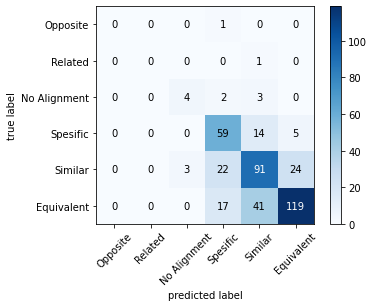

In [38]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.simplefilter('ignore')
y_prob = historyadam.predict(X_test) 
y_pred = y_prob.argmax(axis=-1)
rounded_labels=np.argmax(Y_test, axis=1)
mat = confusion_matrix(rounded_labels, y_pred)
class_names = ['Opposite','Related', 'No Alignment', 'Spesific', 'Similar', 'Equivalent']
plot_confusion_matrix(conf_mat=mat, class_names = class_names, cmap=plt.cm.Blues, colorbar=True)
print(classification_report(rounded_labels, y_pred))
#plot_cm(history, X_test, Y_test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         9
           3       0.35      0.18      0.24        78
           4       0.37      0.56      0.45       140
           5       0.62      0.54      0.58       177

    accuracy                           0.47       406
   macro avg       0.22      0.21      0.21       406
weighted avg       0.47      0.47      0.45       406



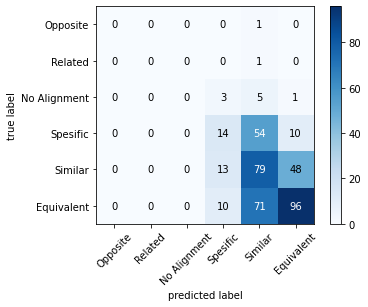

In [39]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.simplefilter('ignore')
y_prob = historysgd.predict(X_test) 
y_pred = y_prob.argmax(axis=-1)
rounded_labels=np.argmax(Y_test, axis=1)
mat = confusion_matrix(rounded_labels, y_pred)
class_names = ['Opposite','Related', 'No Alignment', 'Spesific', 'Similar', 'Equivalent']
plot_confusion_matrix(conf_mat=mat, class_names = class_names, cmap=plt.cm.Blues, colorbar=True)
print(classification_report(rounded_labels, y_pred))
#plot_cm(historysgd, X_test, Y_test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.38      0.33      0.35         9
           3       0.59      0.73      0.65        78
           4       0.68      0.61      0.64       140
           5       0.69      0.69      0.69       177

    accuracy                           0.66       406
   macro avg       0.39      0.39      0.39       406
weighted avg       0.66      0.66      0.66       406



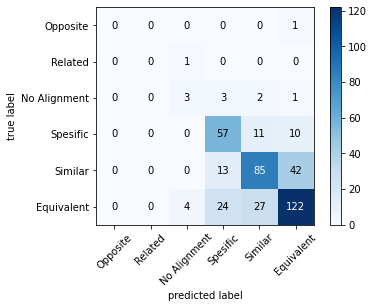

In [40]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.simplefilter('ignore')
y_prob = historyadadelta.predict(X_test) 
y_pred = y_prob.argmax(axis=-1)
rounded_labels=np.argmax(Y_test, axis=1)
mat = confusion_matrix(rounded_labels, y_pred)
class_names = ['Opposite','Related', 'No Alignment', 'Spesific', 'Similar', 'Equivalent']
plot_confusion_matrix(conf_mat=mat, class_names = class_names, cmap=plt.cm.Blues, colorbar=True)
print(classification_report(rounded_labels, y_pred))
#plot_cm(historyadadelta, X_test, Y_test)

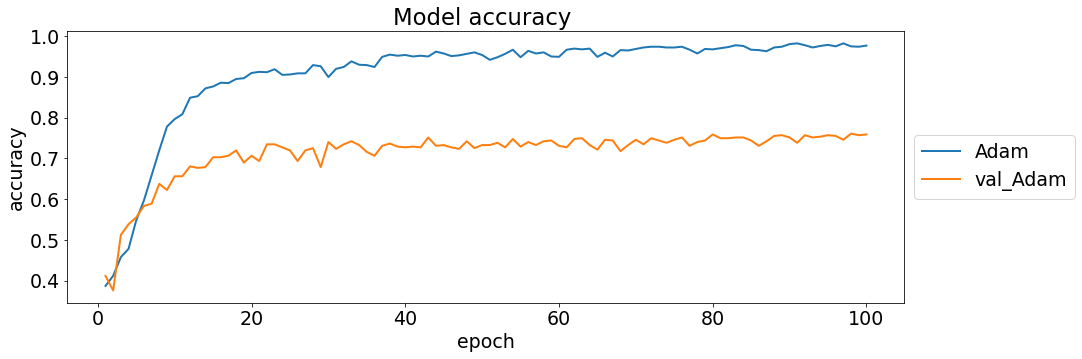

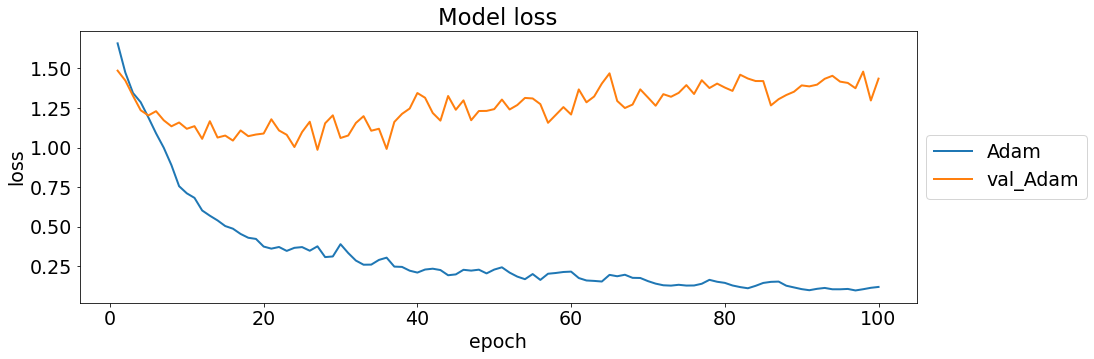

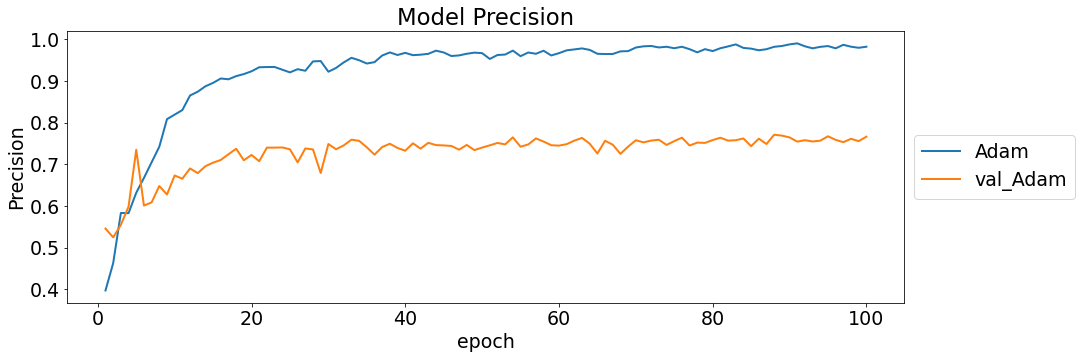

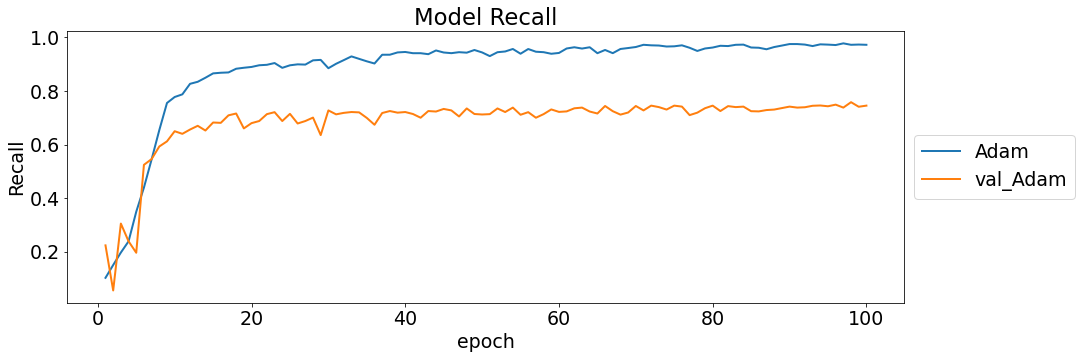

In [41]:
log_data = pd.read_csv('6lblsg300adamw2v.log', sep=',', engine='python') 
plot_history_model(log_data, "Adam", iterasi)

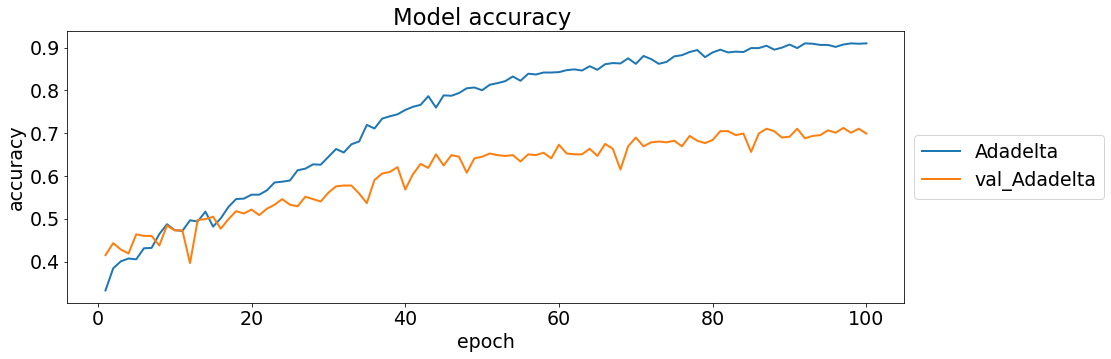

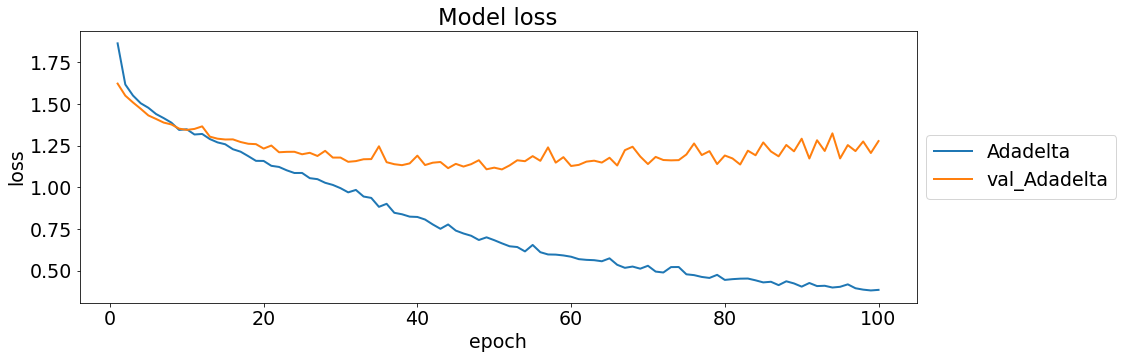

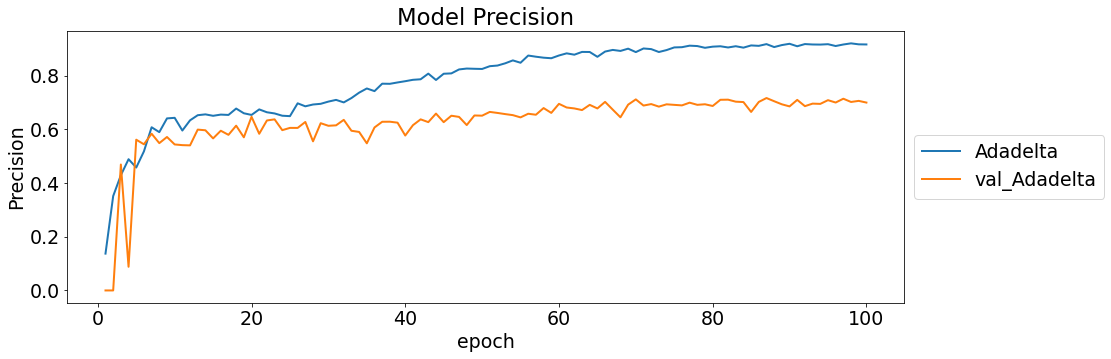

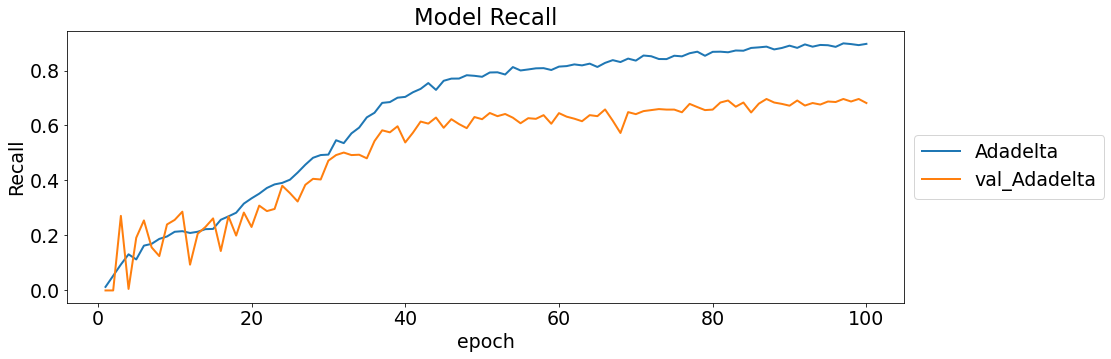

In [42]:
log_data = pd.read_csv('6lblsg300adadeltaw2v.log', sep=',', engine='python') 
plot_history_model(log_data, "Adadelta", iterasi)

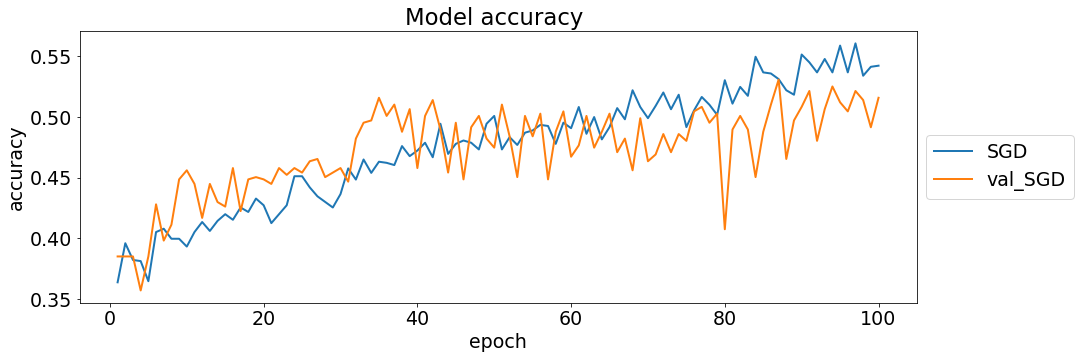

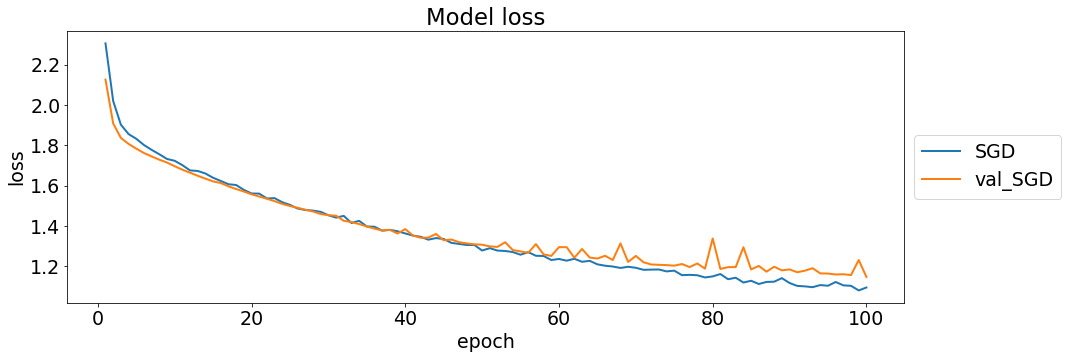

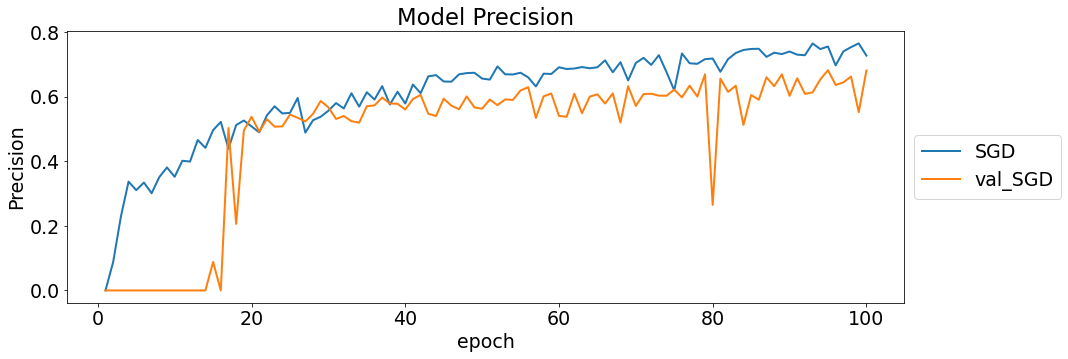

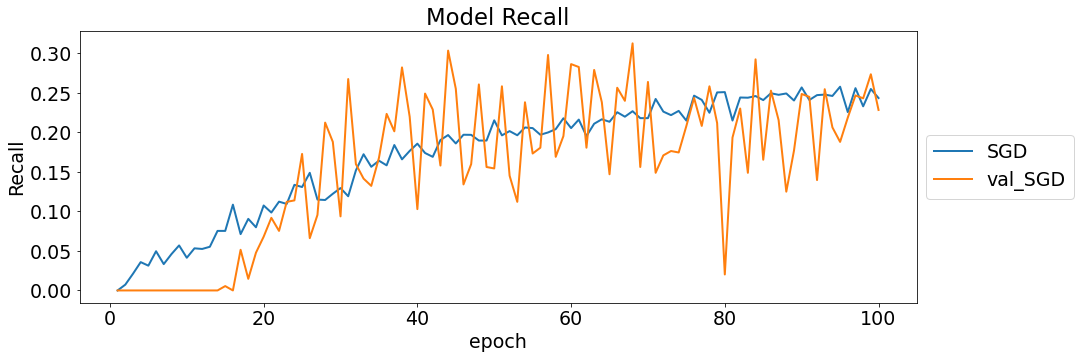

In [43]:
log_data = pd.read_csv('6lblsg300sgdw2v.log', sep=',', engine='python') 
plot_history_model(log_data, "SGD", iterasi)

In [44]:
# serialize model to JSON
model_json = historysgd.to_json()
with open("100sSGDfix.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
historysgd.save_weights("100SGDfix.h5")
print("Saved model to disk")

Saved model to disk


In [45]:
def get_encoded(x):
    x = token.texts_to_sequences(x)
    x = pad_sequences(x, maxlen = max_kata, padding='post')
    return x

In [46]:
kalimat = [] 
kalimat1 = ['This dataset is composed of 35 triplets of sentences from the eye-tracking experiment (experiment 1) in Traxler et al. (2002) , for a total of 105 sentences.'] 
kalimat2 = ['This dataset is composed of 32 sentence quadruplets from experiments 2 (eyetracking ) and 3 (self-paced reading) in Traxler et al. (2002) , for a total of 120 sentences.']
kalimat.append(kalimat1+kalimat2) 
x = get_encoded(kalimat)

In [47]:
X_test.shape

(406, 50)

In [48]:
def hasil(history):
result = history.predict_classes(x)
print("Adam")
if(result==5):
    print("Equivalent")
elif(result==4):
    print("Similar")
elif(result==3):
    print("Spesific")
elif(result==2):
    print("No Alignment")
elif(result==1):
    print("Related")
else:
    print("Opposite")

IndentationError: expected an indented block (Temp/ipykernel_16468/3740221414.py, line 2)